<a href="https://colab.research.google.com/github/CSheppardCodes/Scholastic-Study-of-Machine-Learning/blob/main/CustomGradient-Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/Hlopez490/ML01/main/Container_Crane_Controller_Data_Set.csv", sep=';', decimal = ',')

In [3]:
# remove null,Na,NaN,NaT values from data
data = data.dropna()
data

,Speed,Angle,Power
0,1,-5,0.3
1,2,5,0.3
2,3,-2,0.5
3,1,2,0.5
4,2,0,0.7
5,6,-5,0.5
6,7,5,0.5
7,6,-2,0.3
8,7,2,0.3
9,6,0,0.7


In [4]:
# retrieve y values from data set and store into y
y = data.values[:,-1:]
# retrieve x attributes from data set and store into x
x = data.values[: , 0:2]
m,n = x.shape
# find mean of x for normalization
mu = x.mean(0)
sigma = x.std(0) # standard deviation: max(x)-min(x)
xn = (x - mu) / sigma
# split training and testing data
x = np.hstack((np.ones((m, 1)), xn))
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.7)

In [5]:
x_train, x_test

(array([[ 1.        ,  0.4472136 ,  1.46805055],
        [ 1.        ,  0.1118034 , -1.46805055],
        [ 1.        ,  0.78262379, -1.46805055],
        [ 1.        ,  0.1118034 ,  0.        ]]),
 array([[ 1.        , -0.89442719, -0.58722022],
        [ 1.        , -1.22983739,  0.        ],
        [ 1.        , -1.56524758, -1.46805055],
        [ 1.        ,  0.78262379,  0.58722022],
        [ 1.        ,  1.45344419, -0.58722022],
        [ 1.        , -1.56524758,  0.58722022],
        [ 1.        ,  0.4472136 ,  0.58722022],
        [ 1.        ,  0.1118034 , -0.58722022],
        [ 1.        , -1.22983739,  1.46805055],
        [ 1.        ,  1.11803399,  0.        ],
        [ 1.        ,  1.11803399,  1.46805055]]))

In [6]:
y_train, y_test

(array([[0.5],
        [0.5],
        [0.5],
        [0.7]]),
 array([[0.5],
        [0.7],
        [0.3],
        [0.3],
        [0.3],
        [0.5],
        [0.3],
        [0.3],
        [0.3],
        [0.5],
        [0.5]]))

In [7]:
def ssr_gradient(x, y, w):  # custom gradient function
    res = w[0]*x[0] + w[1] * x[1] + w[2] * x[2] - y
    return res.mean(), (res * x).mean(), (res * x).mean()

In [8]:

def gradient_descent(
     gradient, x, y, start, learn_rate=0.1, n_iter=5000, tolerance=1e-06
 ):
  vector = start
  for _ in range(n_iter):
    diff = -learn_rate * np.array(gradient(x, y, vector))
    if np.all(np.abs(diff) <= tolerance):
      break
    vector += diff
  return vector

In [9]:
theta = gradient_descent(
    ssr_gradient, x_train, y_train, start=[0.5, 0.5,0.5], learn_rate=0.0008,
    n_iter=100000
)

In [10]:
theta

array([0.56660662, 0.05998841, 0.05998841])

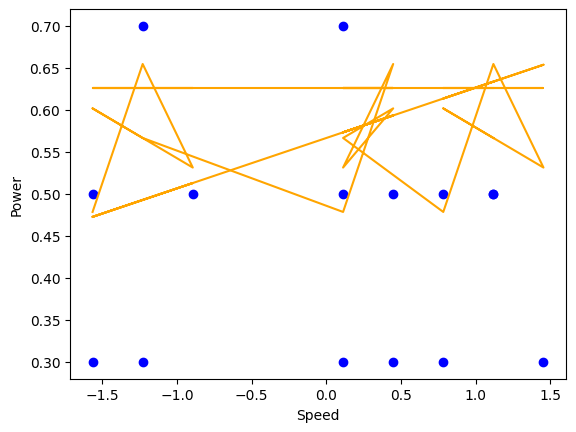

In [11]:
plt.scatter(x[:,1], y, color = "blue")
plt.xlabel("Speed")
plt.ylabel("Power")
plt.plot(x[:,1], theta[0] + theta[1]*x, color = "orange")
plt.show()


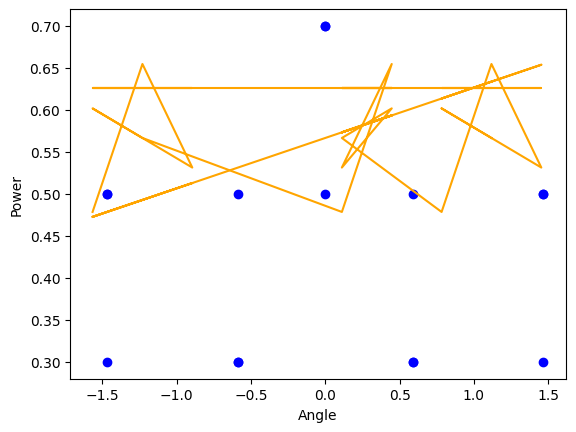

In [12]:
plt.scatter(x[:,2], y, color = "blue")
plt.xlabel("Angle")
plt.ylabel("Power")
plt.plot(x[:,1], theta[0] + theta[2]*x, color = "orange")
plt.show()

California dataset SGDRegressor help


(16512, 5)
(4128, 5)
(16512,)
(4128,)
The model performance for training set
--------------------------------------
RMSE is 0.7817171808042986
R2 score is 0.5368516354485158


The model performance for testing set
--------------------------------------
RMSE is 0.7904414099526889
R2 score is 0.5471444164196908


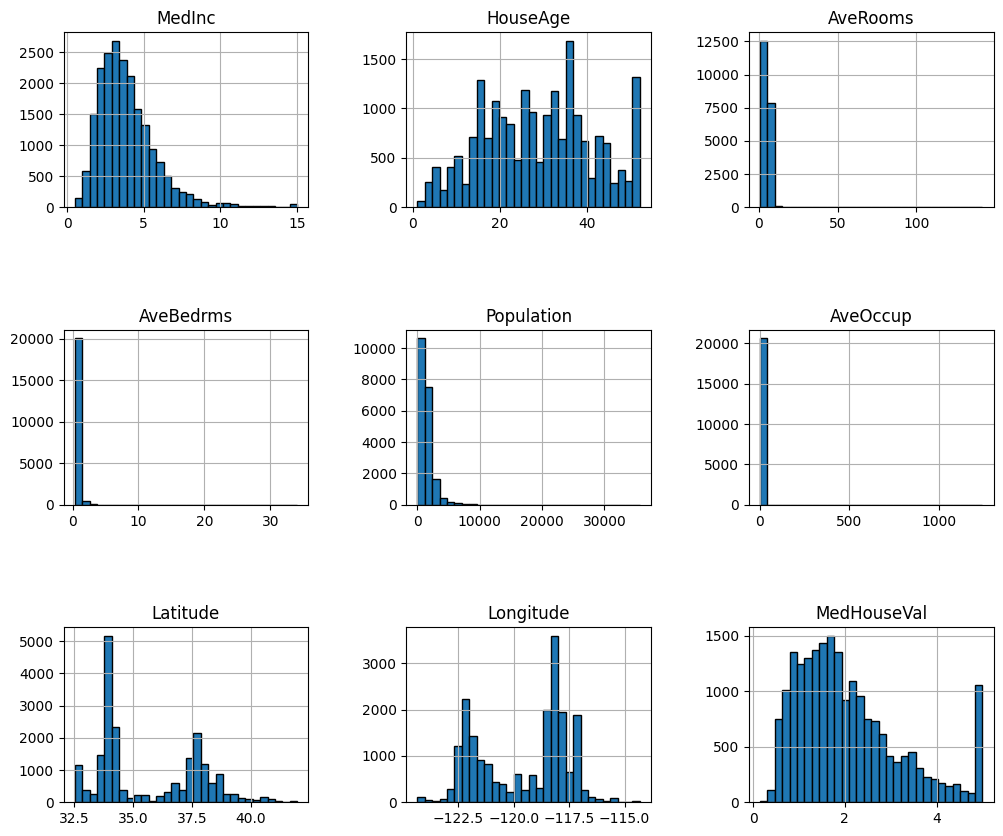

In [16]:
# import numpy as np
# import matplotlib.pyplot as plt
# import pandas as pd
# import seaborn as sns
# from sklearn.metrics import r2_score
# # from sklearn.datasets import load_boston
# from sklearn.preprocessing import StandardScaler
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error
# from sklearn.linear_model import SGDRegressor
# from sklearn.preprocessing import StandardScaler

# %matplotlib inline


# from sklearn.datasets import fetch_california_housing

# california_housing = fetch_california_housing(as_frame=True)


# california_housing.frame.hist(figsize=(12, 10), bins=30, edgecolor="black")
# plt.subplots_adjust(hspace=0.7, wspace=0.4)


# df = california_housing.frame
# X = df.drop(['MedHouseVal', 'Latitude', 'Longitude', 'Population'], axis = 1)

# Y = df['MedHouseVal']

# s = StandardScaler()
# X = pd.DataFrame(s.fit(X).fit_transform(X))


# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
# print(X_train.shape)
# print(X_test.shape)
# print(Y_train.shape)
# print(Y_test.shape)

# model = SGDRegressor(alpha=0.0000001, eta0=0.001, max_iter = 10000000, tol = 0.000001)

# model.fit(X_train, Y_train)

# # model evaluation for training set
# y_train_predict = model.predict(X_train)
# rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
# r2 = r2_score(Y_train, y_train_predict)

# print("The model performance for training set")
# print("--------------------------------------")
# print('RMSE is {}'.format(rmse))
# print('R2 score is {}'.format(r2))
# print("\n")

# # model evaluation for testing set
# y_test_predict = model.predict(X_test)
# rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
# r2 = r2_score(Y_test, y_test_predict)

# print("The model performance for testing set")
# print("--------------------------------------")
# print('RMSE is {}'.format(rmse))
# print('R2 score is {}'.format(r2))
